In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import transitFinderFunctions as courseworkb
import importlib


# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'transitFinderFunctions' from '/home/olivermcevoy/AstroCourseworkB/transitFinderFunctions.py'>

In [2]:
target =  'Kepler-11'
kepler_dataframe_not_nice, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target)

file_path = 'CourseworkData/Objectlc'
kepler_dataframe = courseworkb.loadDataFromFitsFiles(file_path,'medfilt')


4375 4375 4375ght curve segment 62 of 62
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780


In [3]:
cursed_list = []
for _ in range(100):
    temp_list = []
    for _ in range(1):
        kepler_dataframe_tmp = courseworkb.loadDataFromFitsFiles(file_path, filter_type='savgol', randomise=True)
        temp_list.append(kepler_dataframe_tmp)
        #cursed_list.append(average_df)
    
    # Calculate the average of the 40 dataframes
    #average_df = pd.concat(temp_list).groupby(level=0).mean()

cursed_list = temp_list

lightcurve_1 = cursed_list[0]
print(lightcurve_1.head())

4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 

In [4]:
print(len(kepler_dataframe['flux']))
print(len(kepler_dataframe_not_nice['flux']))

64230
1899237


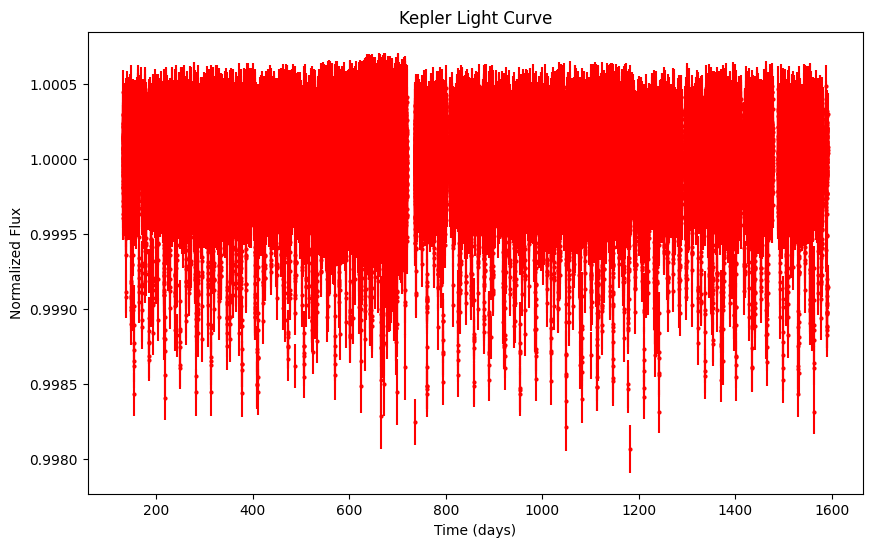

In [5]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


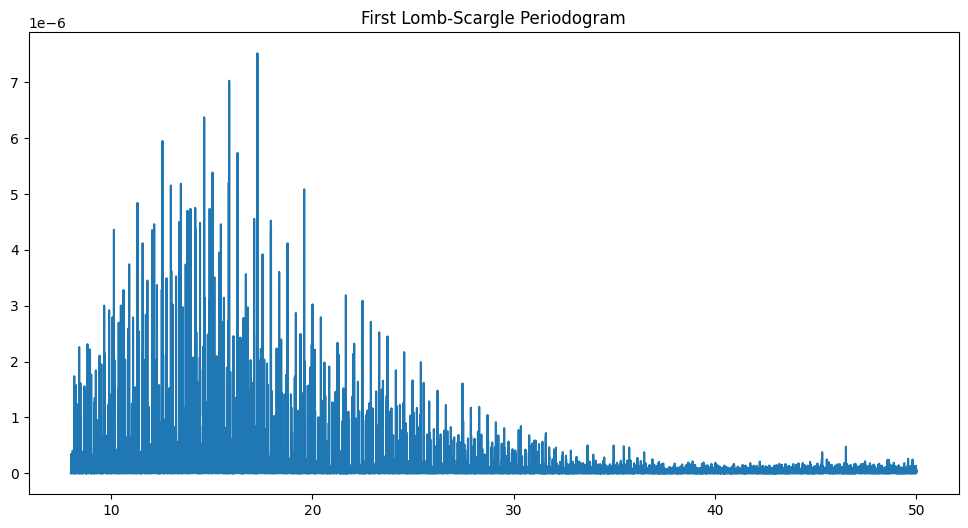

computing second periodogram
Gradient Threshold: 3.29e-13, Second Derivative Threshold: 5.24e-10


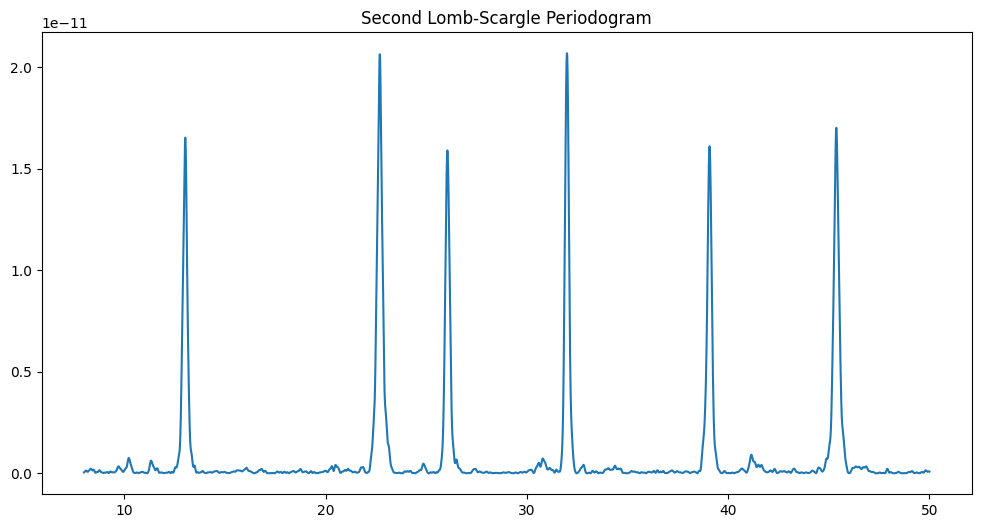

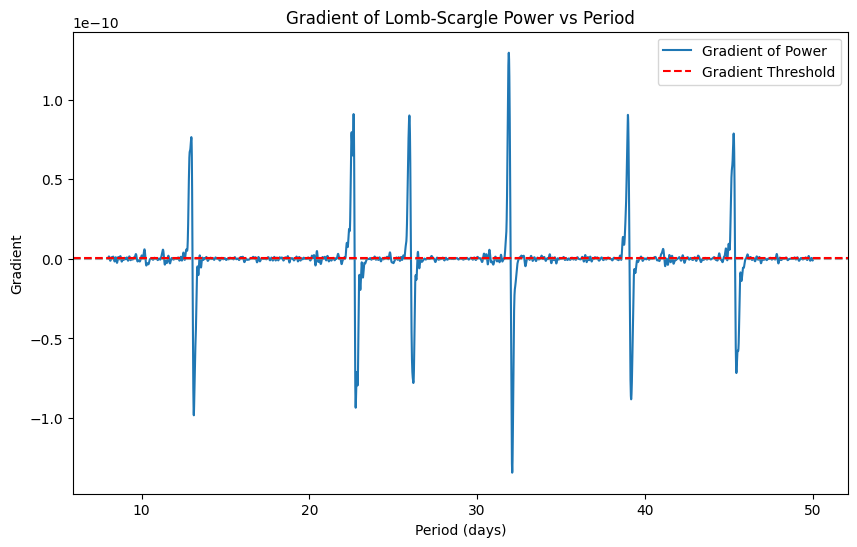

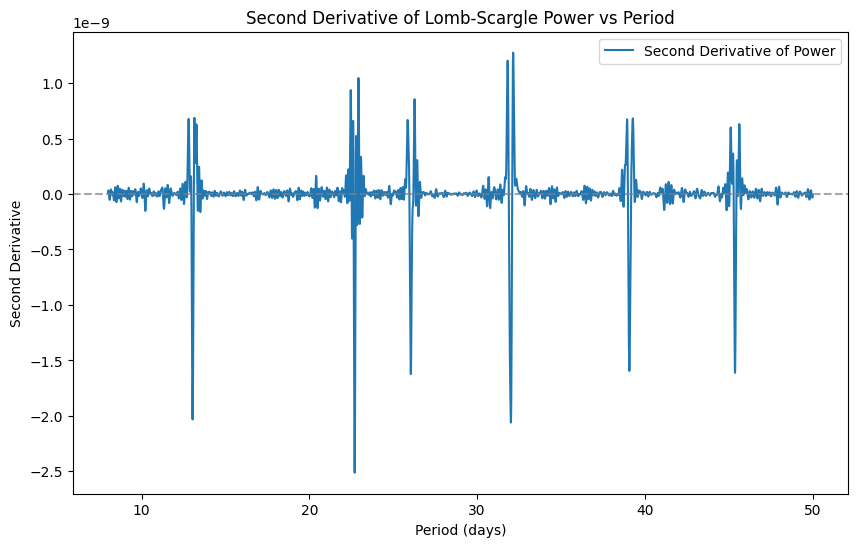

Excluding peaks before period = 8.09 days
Lomb-Scargle Periodogram analysis done


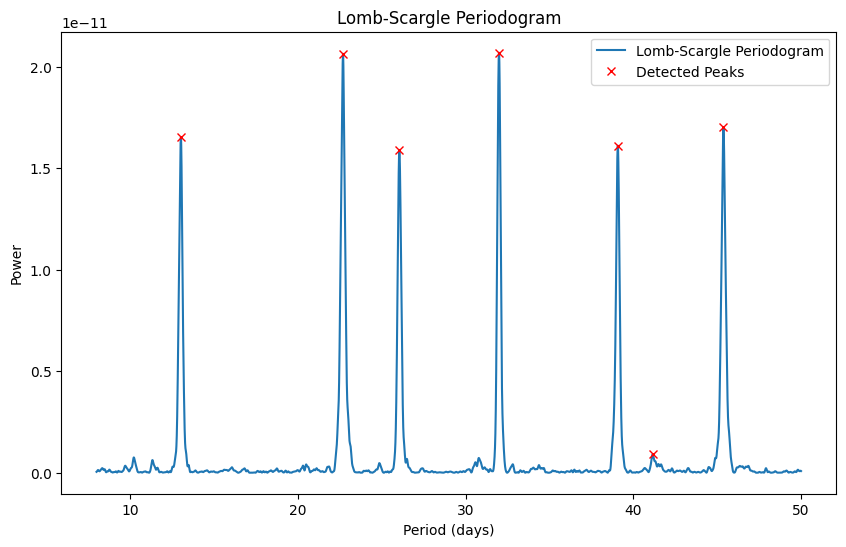

In [6]:
# period_range_zoom =(1,20)
# peaks_of_lightcurve_zoom = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_zoom , list_of_random_lightcurves=cursed_list)

period_range_regular = (8 ,50)
#peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_regular,list_of_random_lightcurves=cursed_list)
peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=80000, period_range=period_range_regular)


# add 2 sets of peak to the same array
#peaks_of_lightcurve = np.concatenate((peaks_of_lightcurve_zoom,peaks_of_lightcurve),axis=0)

Running Lomb-Scargle Periodogram Analysis...
List of random light curves present, computing random light curves


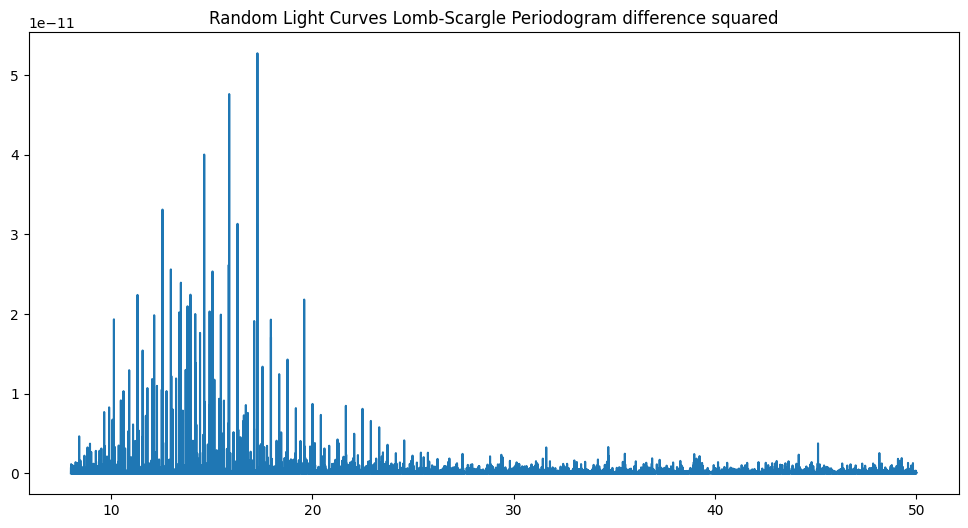

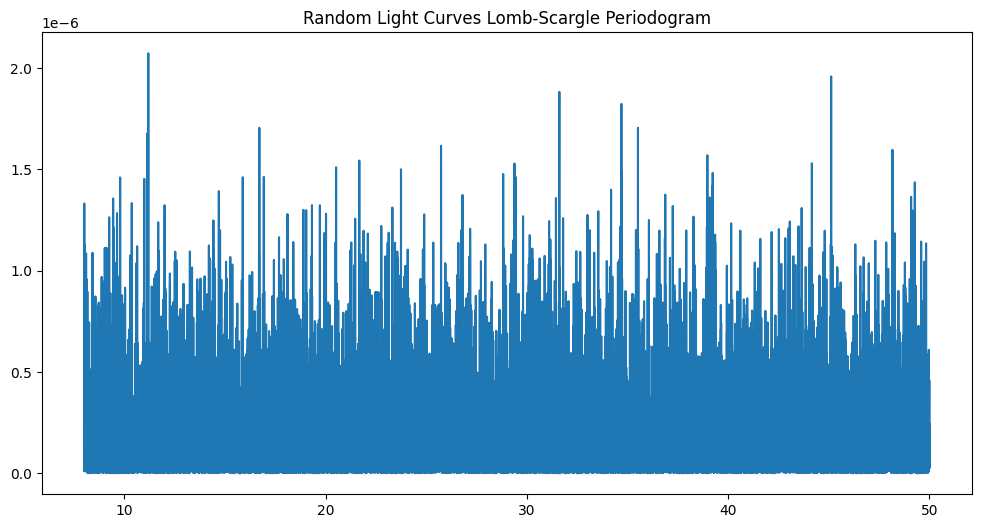

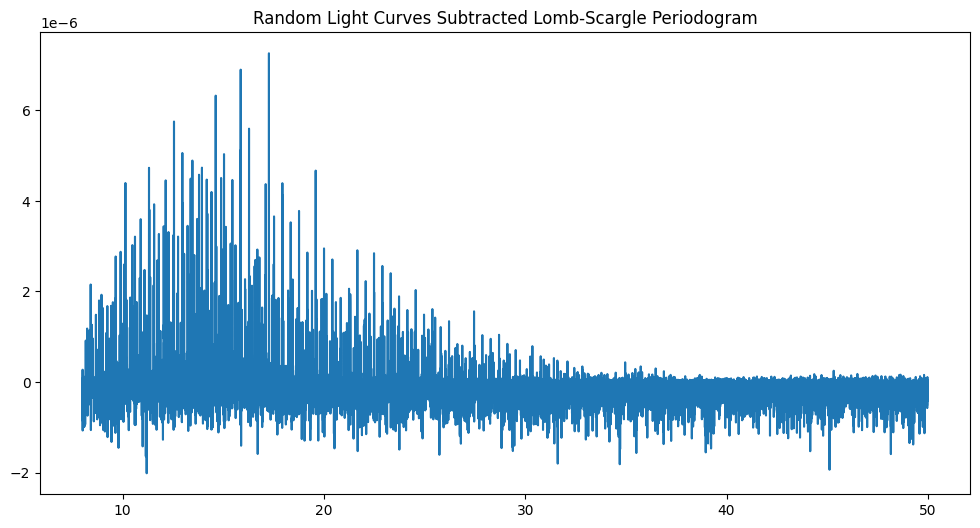

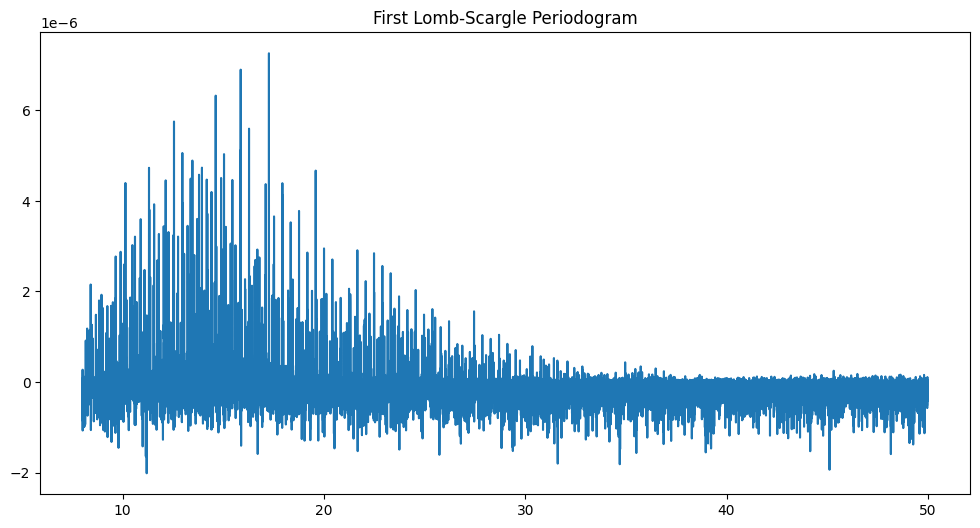

computing second periodogram
computing second periodogram for difference squared


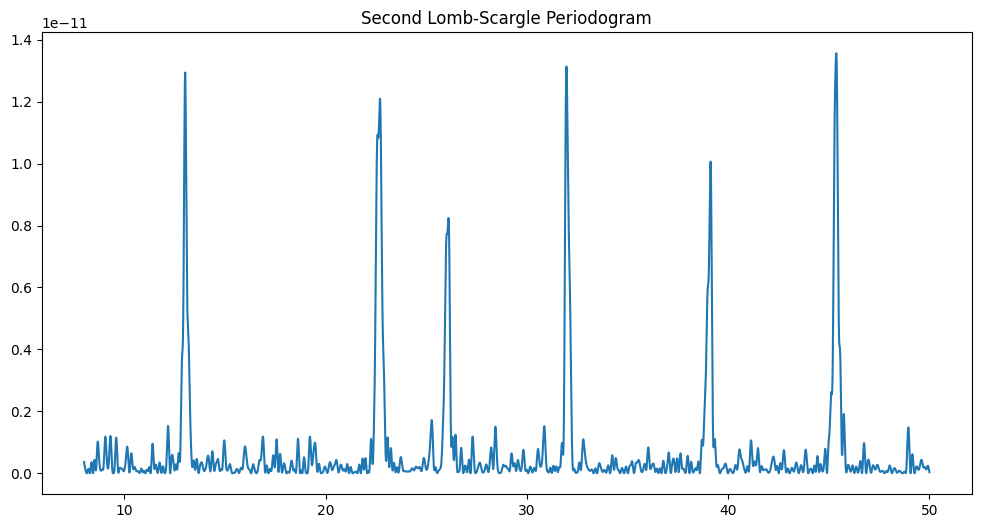

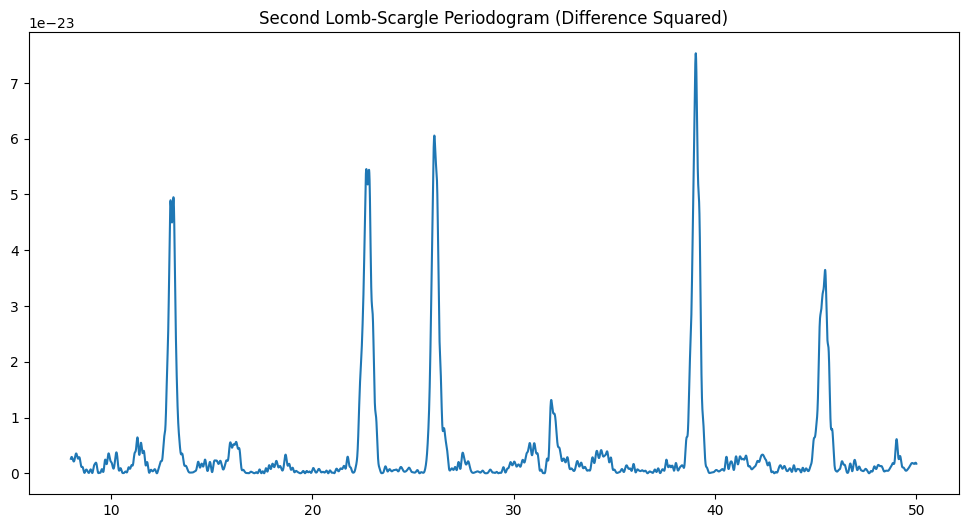

Gradient Threshold: 4.20e-12, Second Derivative Threshold: 7.37e-10


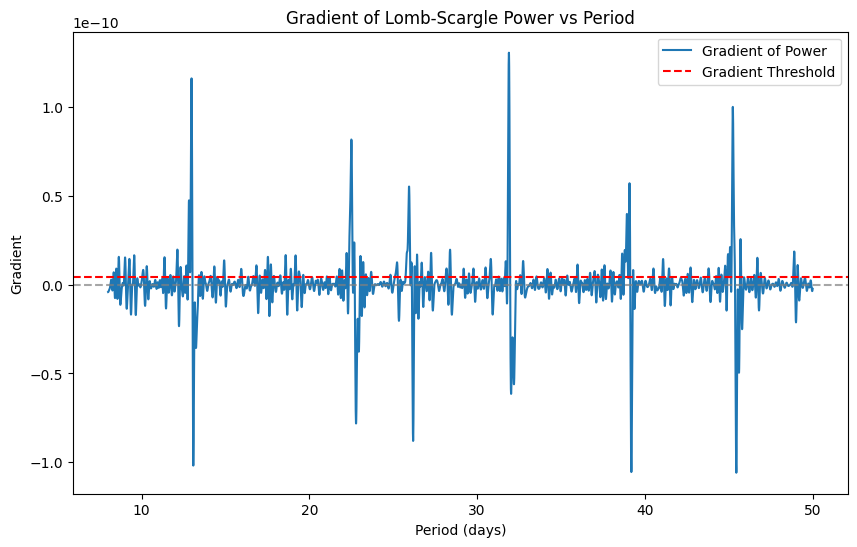

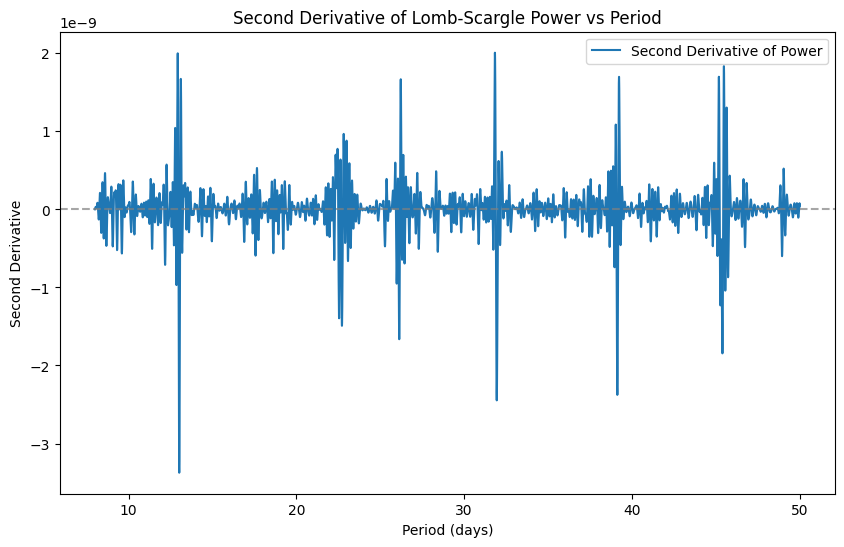

Excluding peaks before period = 8.00 days
Lomb-Scargle Periodogram analysis done


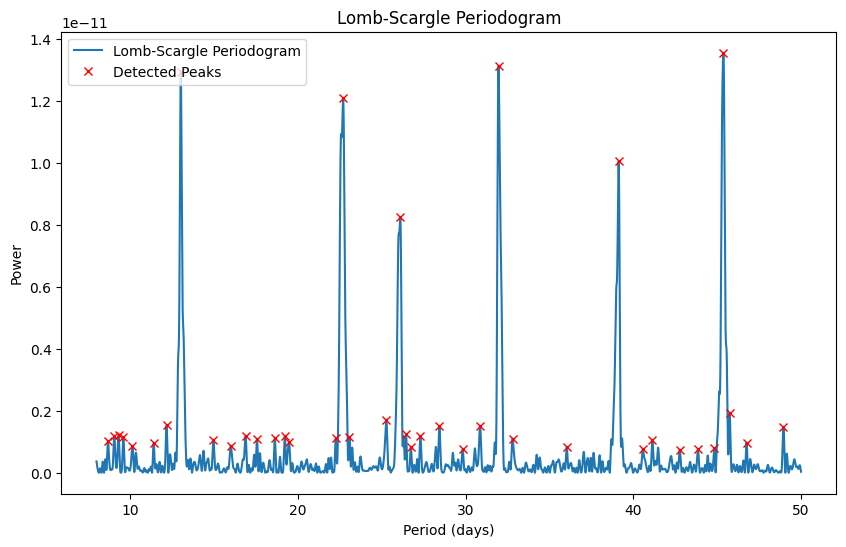

In [7]:
peaks_of_lightcurve_different = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=50000, period_range=period_range_regular, list_of_random_lightcurves=cursed_list, different=True)


In [8]:
print(len(peaks_of_lightcurve))
peaks_of_lightcurve_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve,0.05, False)
print(len(peaks_of_lightcurve_filt))




results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_filt,
      10000
)





7
Adding period 13.030 days to the unique results.
Adding period 22.695 days to the unique results.
Adding period 26.053 days to the unique results.
Adding period 31.993 days to the unique results.
Adding period 39.076 days to the unique results.
Adding period 41.153 days to the unique results.
Adding period 45.373 days to the unique results.
7
Analyzing period 13.03 days...
Analyzing period 22.69 days...
Analyzing period 26.05 days...
Analyzing period 31.99 days...
Analyzing period 39.08 days...
Analyzing period 41.15 days...
Analyzing period 45.37 days...
Best Period: 13.025005633602524, Best Duration: 0.17500000000000002, Best Transit Time: 138.17341440602013
Best Period: 22.686989665478627, Best Duration: 0.214, Best Transit Time: 148.46091440602015
Best Period: 26.050009558012764, Best Duration: 0.177, Best Transit Time: 138.17241440602012
Best Period: 31.99556467328129, Best Duration: 0.151, Best Transit Time: 154.15941440602015
Best Period: 39.075016049461794, Best Duration: 0.1

In [9]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.1, 0.1)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")


Number of peaks found: 7
Adding period 13.025 days to the unique results.
Adding period 22.687 days to the unique results.
Adding period 26.050 days to the unique results.
Adding period 31.996 days to the unique results.
Adding period 39.075 days to the unique results.
Adding period 45.374 days to the unique results.
Adding period 13.025 days to the final results.
Adding period 26.050 days to the final results.
Adding period 31.996 days to the final results.
Adding period 39.075 days to the final results.
Number of peaks found after removing duplicates: 4


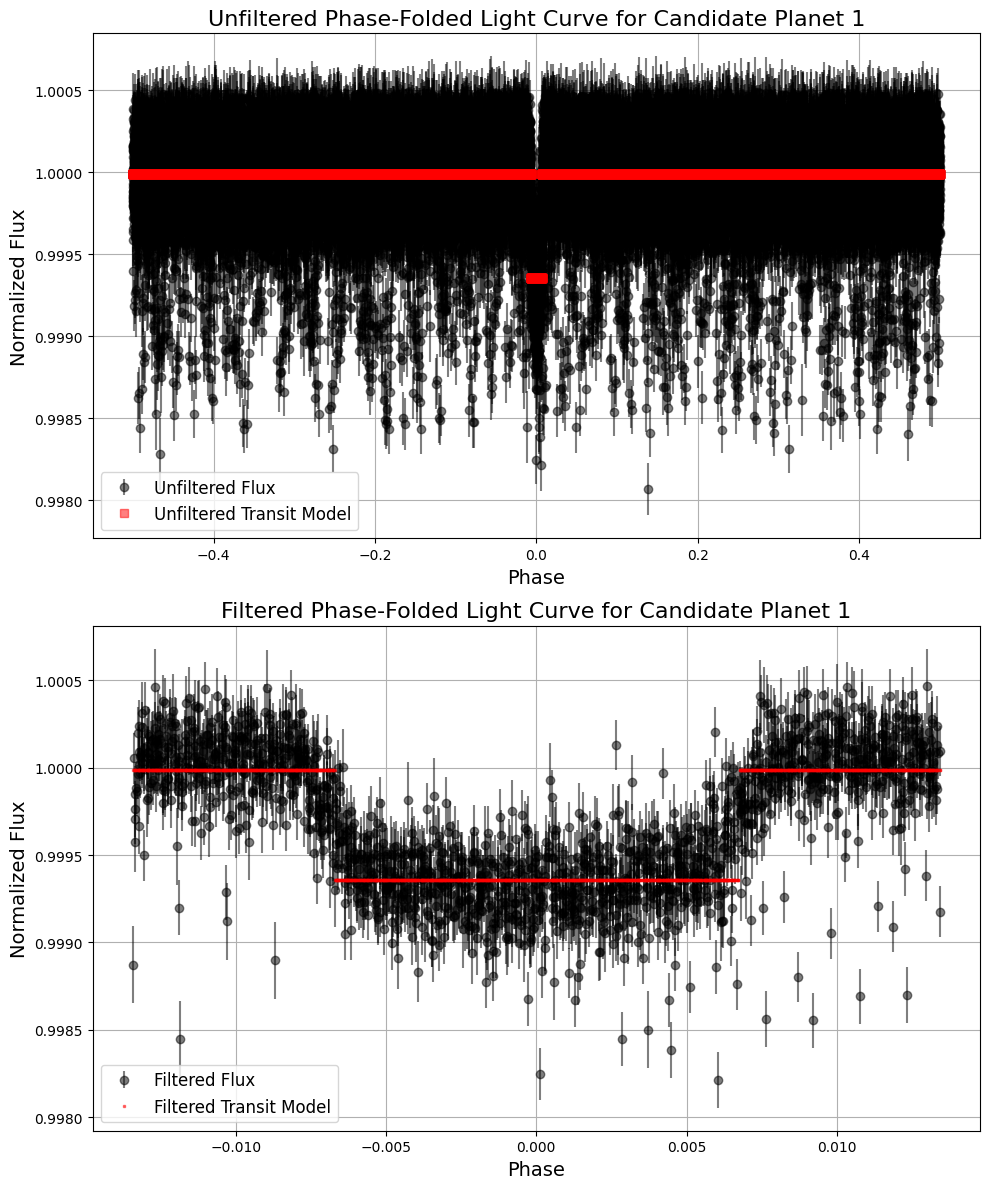

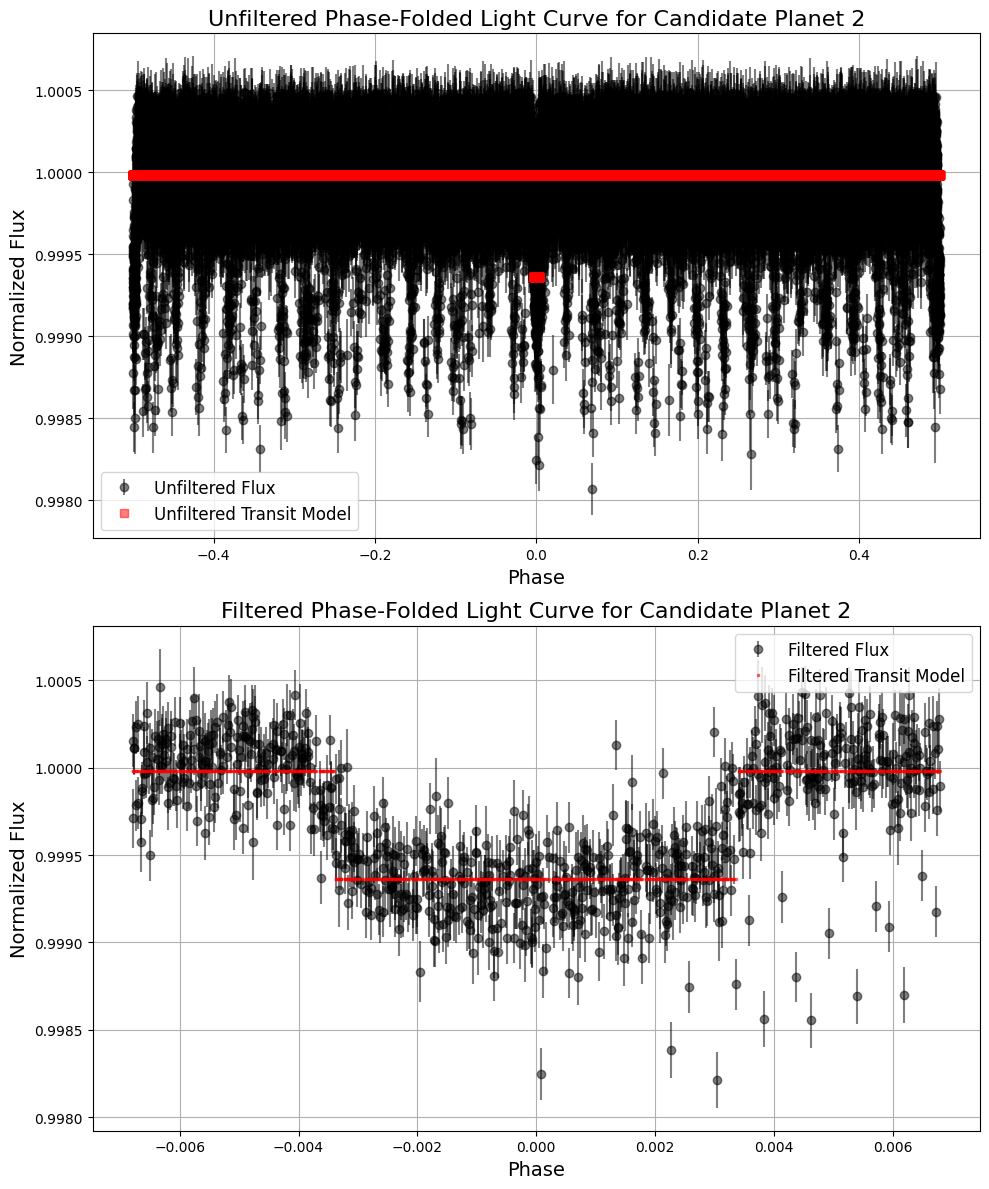

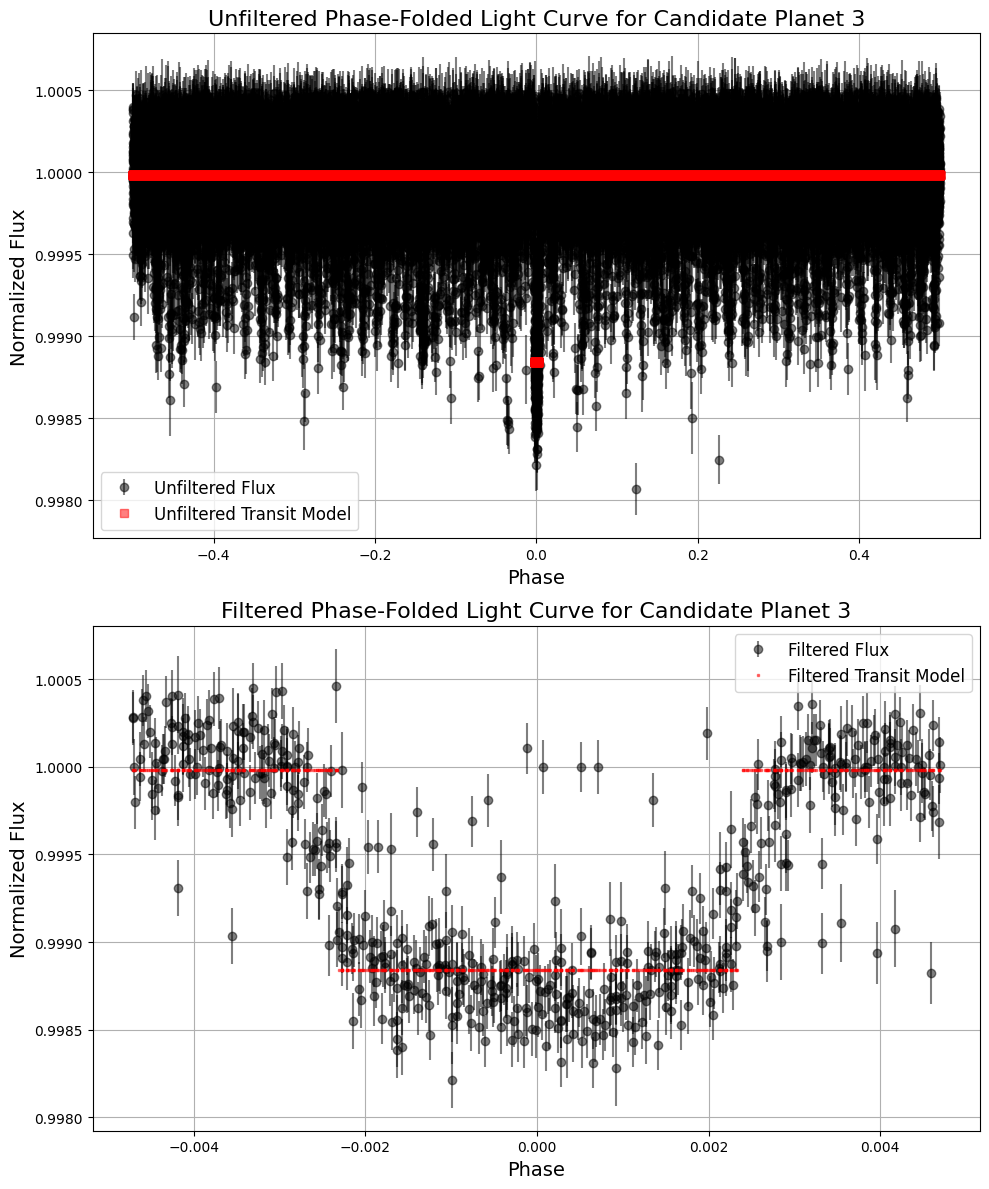

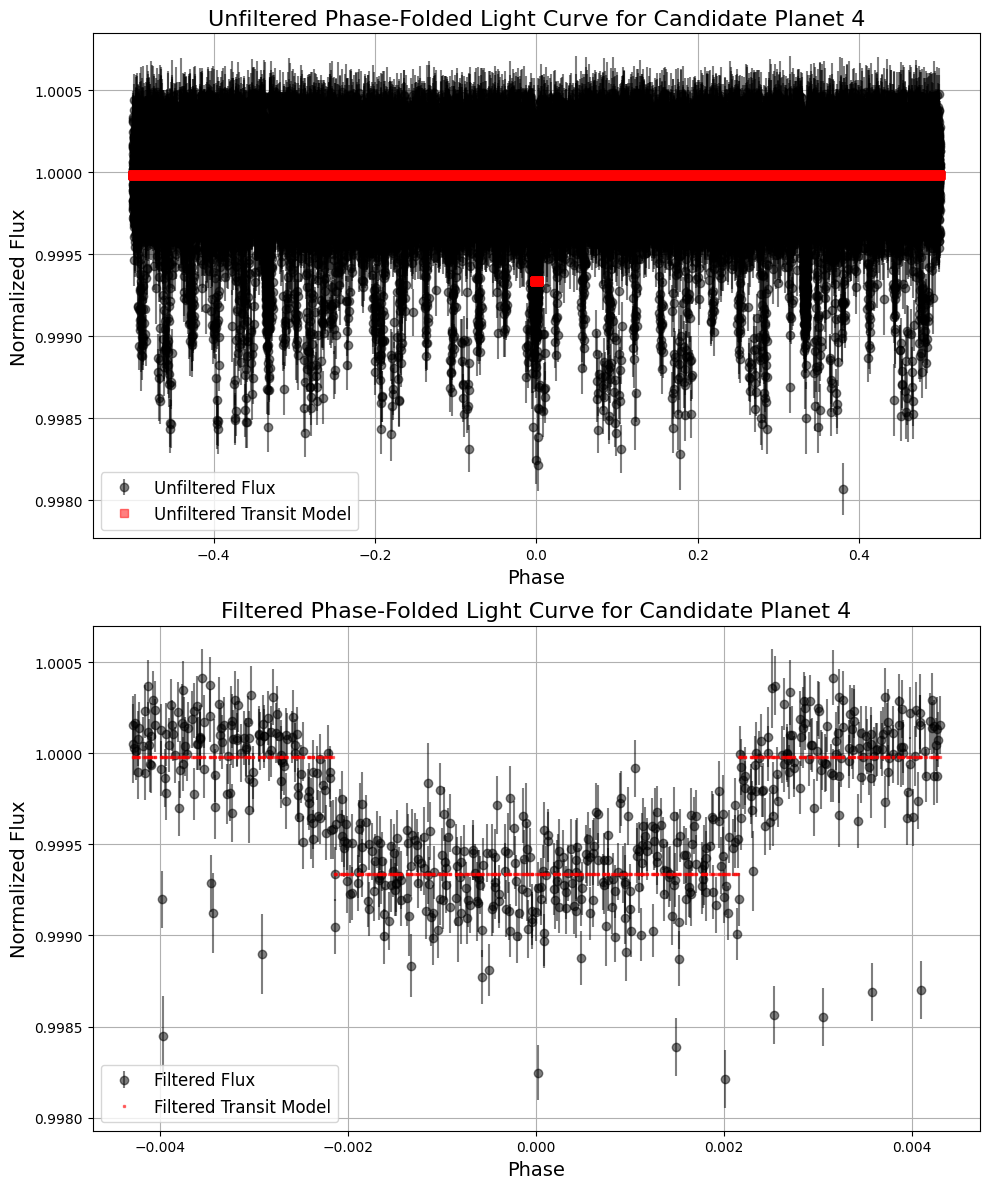

In [10]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [11]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.046 Solar Radii
Stellar Temperature: 5657 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 13.03 days
  Refined Period = 13.03 days
  Transit Depth  = 6.30e-04
  Transit Duration = 0.18 days
  Power = 7032.71
----------------------------------------
Best Transit Candidate: Period = 13.03 days, Depth = 6.30e-04
Estimated Planet Radius: 0.026 Solar Radii
Estimated Planet Radius: 2.864 Earth Radii
Estimated Planet Radius: 0.261 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 26.05 days
  Refined Period = 26.05 days
  Transit Depth  = 6.23e-04
  Transit Duration = 0.18 days
  Power = 3517.76
----------------------------------------
Best Transit Candidate: Period = 26.05 days, Depth = 6.23e-04
Estimated Planet Radius: 0.026 Solar Radii
Estimated Planet Radius: 2.848 Earth Radii
Estimated Planet Rad

In [ ]:
peaks_of_lightcurve_different_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve_different,0.05, False)

results_list_different = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_different_filt,
      10000
)

results_list_different = courseworkb.remove_duplicate_periods(results_list_different,0.1,0.1, 0.1)

courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list_different )

courseworkb.summarize_results(results_list_different,stellar_data)

Adding period 8.685 days to the unique results.
Adding period 9.314 days to the unique results.
Adding period 10.144 days to the unique results.
Adding period 11.407 days to the unique results.
Adding period 12.175 days to the unique results.
Adding period 13.025 days to the unique results.
Adding period 14.967 days to the unique results.
Adding period 15.999 days to the unique results.
Adding period 16.887 days to the unique results.
Adding period 18.630 days to the unique results.
Adding period 22.261 days to the unique results.
Adding period 25.275 days to the unique results.
Adding period 26.738 days to the unique results.
Adding period 28.437 days to the unique results.
Adding period 30.865 days to the unique results.
Adding period 32.802 days to the unique results.
Adding period 36.031 days to the unique results.
Adding period 39.126 days to the unique results.
Adding period 41.136 days to the unique results.
Adding period 43.853 days to the unique results.
Adding period 46.751 d